# Bank Loan Deafaulter Detection

Lets start with importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colour=sns.color_palette()

In [5]:
df=pd.read_excel('D:\\Datascience\\bank loan risk- aap\\loan.xlsx')

In [25]:
print(df.shape)

(39717, 37)


In [7]:
pd.set_option('display.max_columns',50)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,0.837,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,0.094,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,0.985,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,0.210,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,17.94,0,1996-01-01,0,38.0,NaN,15,0,27783,0.539,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null object
dti                        39717 non-null float64
delinq_2yrs                39717 non-null int64
e

In [9]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0000,516221.0000,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.0000,666780.0000,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.0000,5500.0000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.0000,5400.0000,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0000,5000.0000,8975.000000,1.440000e+04,3.500000e+04
int_rate,39717.0,0.120212,0.037248,0.0542,0.0925,0.118600,1.459000e-01,2.459000e-01
installment,39717.0,324.561922,208.874874,15.6900,167.0200,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.0000,40404.0000,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.0000,8.1700,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.0000,0.0000,0.000000,0.000000e+00,1.100000e+01


In [11]:
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymn

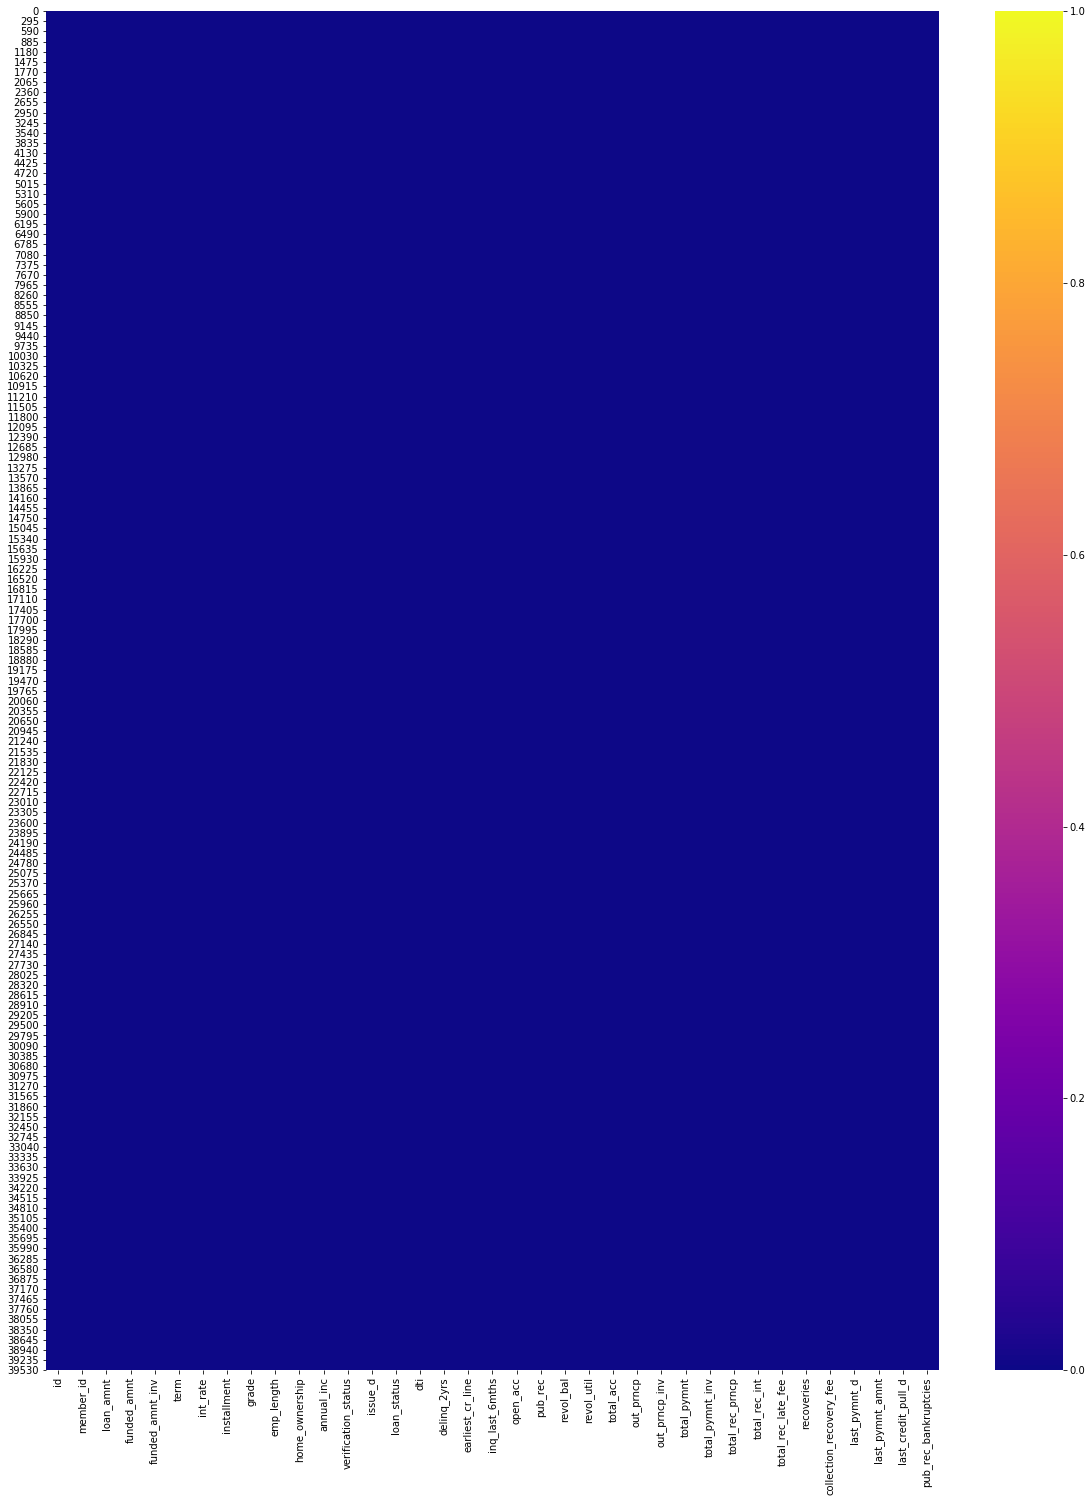

In [29]:
plt.figure(figsize=(20,25))
sns.heatmap(df.isnull(),xticklabels=df.columns, cmap='plasma')
plt.show()

from the above heat map we can visualy see that the varibale like 'mths_since_last_record' and 'next_payment_d' has lots of missing datas. lets analyze the same mathematically

In [13]:
columns=[]
null_values=[]
percentage=[]
for col in df.columns:
    if df[col].isnull().sum()!=0:
        null=df[col].isnull().sum()
        null_values.append(null)
        percent=np.round((null/df[col].isnull().count())*100,2)
        percentage.append(percent)
        columns.append(col)    

In [14]:
summary=pd.DataFrame({'columns':columns, 'null_values':null_values, '%': percentage})

In [15]:
summary

,columns,null_values,%
0,emp_length,1075,2.71
1,mths_since_last_delinq,25682,64.66
2,mths_since_last_record,36931,92.99
3,revol_util,50,0.13
4,last_pymnt_d,71,0.18
5,next_pymnt_d,38577,97.13
6,last_credit_pull_d,2,0.01
7,pub_rec_bankruptcies,697,1.75


from the above table we can see that variables 'mths_since_last_delinq', 'mths_since_last_record' and 'next_pymnt_d' have 64.66%. 93% and 97% of missing data respectively. we drop these variable

In [16]:
df=df.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis=1)


In [17]:
df.shape

(39717, 38)

lets fill in the missing values for the remaning variable

In [18]:
for col in df.select_dtypes(('int64', 'float64')):
    if df[col].isnull().sum()!=0:
        df[col]=df[col].fillna(df[col].mean())

In [19]:
for col in df.select_dtypes('object'):
    if df[col].isnull().sum()!=0:
        df[col]=df[col].fillna(df[col].value_counts().index[0])

there are two types of grading system. one grade and the other is sub-grade, sub grade is nothing but a further categorization of the Grade. lets see how many levels does these two variable have and based on that we might wanna drop one pf the variable 

In [21]:
df['grade'].nunique()

7

In [22]:
df['sub_grade'].nunique()

35

Since Sub grade had too many levels. its better we choose grade variable ove sub_grade because the grade varibale gives enough explaination with limited level

In [24]:
df=df.drop('sub_grade', axis=1)

lets use foward fill method to handle missing value in 'last_payment_d' variable

In [28]:
 df['last_pymnt_d']=df['last_pymnt_d'].ffill()

### Visualization

In [30]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [52]:
size=[df.loan_status[df['loan_status']=='Fully Paid'].count(),df.loan_status[df['loan_status']=='Charged Off'].count(),df.loan_status[df['loan_status']=='Current'].count()]
size

[32950, 5627, 1140]

In [53]:
labels=['Fully paid', 'Charged off', 'Current']

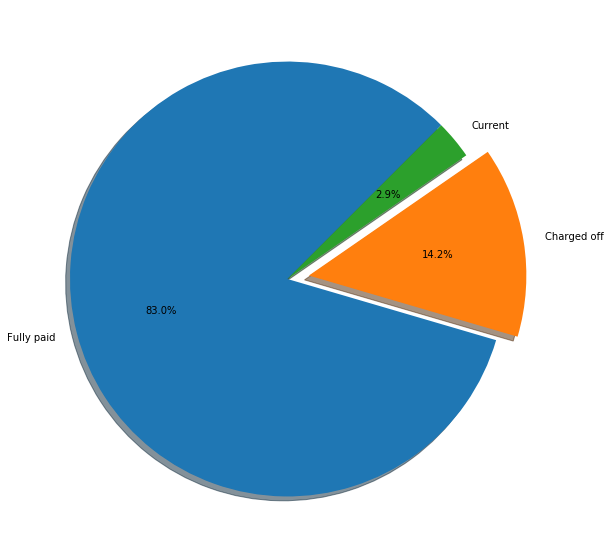

In [57]:
plt.figure(figsize=(10,10))
plt.pie(size, labels=labels, explode=(0,0.1,0), shadow=True, autopct='%1.1f%%', startangle=45)
plt.show()

now we see that 83% fully paid and 2.9% are currently paying thier loan. and 14.2% have charges off with out paying back the bank. 

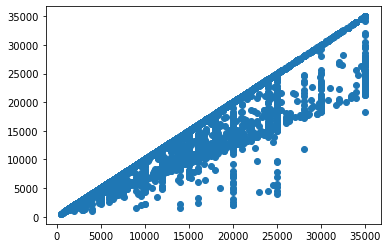

In [58]:
plt.scatter(df['loan_amnt'], df['funded_amnt'])

We see mostly the loan_amount and the funded amount follows a linear relation ship.

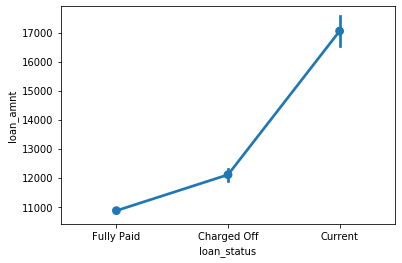

In [61]:
sns.pointplot(y='loan_amnt',x='loan_status', data=df)
plt.show()

We can clearlt see that the loan amount fully paid is lower as compare to Charged off and current

In [63]:
own_status=pd.crosstab(df['home_ownership'], df['loan_status'])
own_status

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
MORTGAGE,2327,638,14694
NONE,0,0,3
OTHER,18,0,80
OWN,443,83,2532
RENT,2839,419,15641


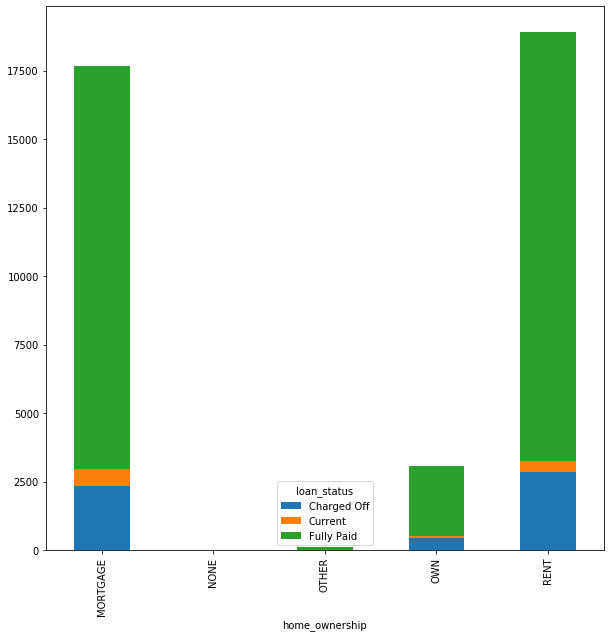

In [67]:
own_status.plot(kind='bar', stacked=True, figsize=(10,10))
plt.show()

people in the rented pkace have charged of more than Mortgage and Own

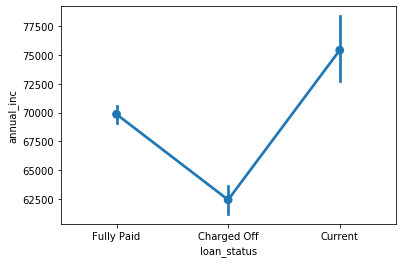

In [68]:
sns.pointplot(x='loan_status', y='annual_inc', data=df)
plt.show()

its very Evident form the above graph the people with lower annual income has a higher chances for defaulting the payment